# DA Humi Gadget in Housing Response Time Temperature with hole

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean
#from quickplot import QuickPlot

import sensirion_fastedf as fastedf
import datetime
import data_access as da
import csv
import math
from scipy.optimize import curve_fit
from sklearn import preprocessing

In [2]:
amb1 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/2022-10-24_16-44-56-SHT40_279916703.edf')
amb2 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/2022-10-24_16-44-56-SHT40_279922293.edf')
DM = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/20221024T145220Z_dmeiThunderMeas_HumiGadget_Resp_T3/20221024T145243Z_dmeiThunderMeas_HumiGadget_Resp_T3T14C/20221024T145243Z_DPM373_DewPointMirror.edf')

HumiGadget = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/Sensirion_MyAmbience_Full_SHT40_Gadget_13C5_2022-10-25T09-49-46.161871.edf')
HumiGadgetbare = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/Sensirion_MyAmbience_Bare_SHT40_Gadget_F109_2022-10-25T09-50-45.384235.edf')
HumiGadgetHole = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/Sensirion_MyAmbience_Hole_Old_SHT40_Gadget_FEF1_2022-10-25T09-47-46.181368.edf')
HumiGadgetNoCylinder = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_T3/Sensirion_MyAmbience_NEW_SHT40_Gadget_9D56_2022-10-25T09-48-46.400682.edf')
# amb1.head()

# HumiGadget.RH.plot()
# print(HumiGadget)

start = datetime.datetime(2022,10,25,6,0).timestamp() # from amb1 starting measurement
# start = amb1.Epoch_UTC[0] + 3*60*60 # shifted by three hours since in the beginning it needed to adjust to the thunder
# print(start)

HumiGadget.Epoch_UTC = HumiGadget.Epoch_UTC - start
HumiGadgetbare.Epoch_UTC = HumiGadgetbare.Epoch_UTC - start
HumiGadgetHole.Epoch_UTC = HumiGadgetHole.Epoch_UTC - start
HumiGadgetNoCylinder.Epoch_UTC = HumiGadgetNoCylinder.Epoch_UTC - start
amb1.Epoch_UTC = amb1.Epoch_UTC - start
amb2.Epoch_UTC = amb2.Epoch_UTC - start
DM.Epoch_UTC = DM.Epoch_UTC - start
# print(HumiGadget)
HumiGadget = HumiGadget.where(HumiGadget.Epoch_UTC > 0).dropna()
HumiGadgetbare = HumiGadgetbare.where(HumiGadgetbare.Epoch_UTC > 0).dropna()
HumiGadgetHole = HumiGadgetHole.where(HumiGadgetHole.Epoch_UTC > 0).dropna()
HumiGadgetNoCylinder = HumiGadgetNoCylinder.where(HumiGadgetNoCylinder.Epoch_UTC > 0).dropna()
amb1 = amb1.where(amb1.Epoch_UTC > 0).dropna()
amb2 = amb2.where(amb2.Epoch_UTC > 0).dropna()
DM = DM.where(DM.Epoch_UTC > 0).dropna()
print(HumiGadget.head())
print(HumiGadget.iloc[1,0])
# print(amb2.head())

       Epoch_UTC             Local_Date_Time       T      RH
14972        1.7  2022-10-25T08:00:01.747517  14.028  50.958
14973        3.7  2022-10-25T08:00:03.747527  14.030  50.970
14974        5.7  2022-10-25T08:00:05.747530  13.998  50.958
14975        7.7  2022-10-25T08:00:07.747931  14.030  50.973
14976        9.7  2022-10-25T08:00:09.747933  14.030  50.952
3.700000047683716


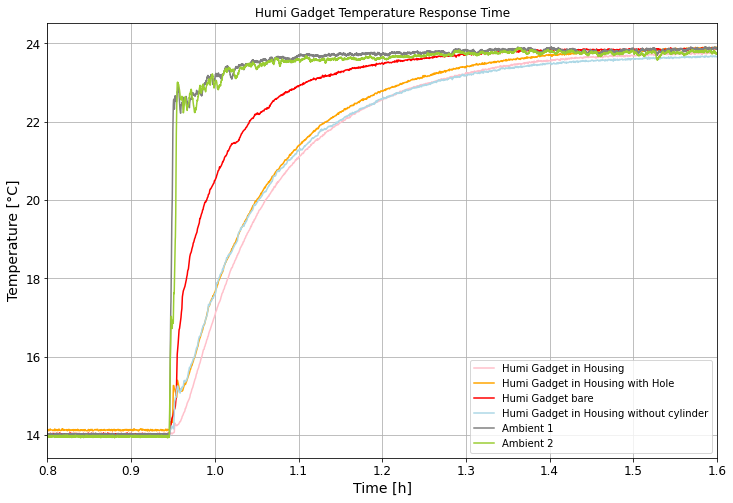

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.set_title('Humi Gadget Temperature Response Time')
# ax.fill_between(DM.Epoch_UTC/3600, DM.T_DewPointMirror - 0.5, DM.T_DewPointMirror + 0.5, facecolor='blue', alpha=0.1)
# ax.plot(DM.Epoch_UTC/3600, DM.T_DewPointMirror, color = 'blue')
ax.plot(HumiGadget.Epoch_UTC/3600, HumiGadget['T'], color = 'pink', label = 'Humi Gadget in Housing')
ax.plot(HumiGadgetHole.Epoch_UTC/3600, HumiGadgetHole['T'], color = 'orange', label = 'Humi Gadget in Housing with Hole')
ax.plot(HumiGadgetbare.Epoch_UTC/3600, HumiGadgetbare['T'], color = 'red', label = 'Humi Gadget bare')
ax.plot(HumiGadgetNoCylinder.Epoch_UTC/3600, HumiGadgetNoCylinder['T'], color = 'lightblue', label = 'Humi Gadget in Housing without cylinder')
ax.plot(amb1.Epoch_UTC/3600, amb1.T_SHT40_279916703, color = 'grey', label = 'Ambient 1')
ax.plot(amb2.Epoch_UTC/3600, amb2.T_SHT40_279922293, color = 'yellowgreen', label = 'Ambient 2')

ax.set_ylabel('Temperature [°C]', fontsize=14)
ax.set_xlabel('Time [h]', fontsize=14)
# ax.set_ylim(15,28)
ax.set_xlim(0.8,1.6)
ax.legend(loc='lower right')
ax.tick_params(labelsize=12)
ax.grid()

Conclusion: No cylinder does not effect the response time

## Generate Plot for Github --> 0 - 100%

In [4]:
sensor = [amb1, HumiGadget, HumiGadgetbare, HumiGadgetHole]
attribute = ['T_SHT40_279916703', 'T', 'T', 'T']

ending = mean(amb1.T_SHT40_279916703.where(amb1.Epoch_UTC/3600 > 1.2).dropna())
print(ending)

for nr, name in enumerate(sensor):
    zero = mean(name[attribute[nr]].where(name.Epoch_UTC/3600 < 0.9).dropna())
    data = name[attribute[nr]].where((name.Epoch_UTC/3600 > 0.9)).dropna()
    name['Normalized'] = (data - zero)/(ending - zero)

23.82911249137529


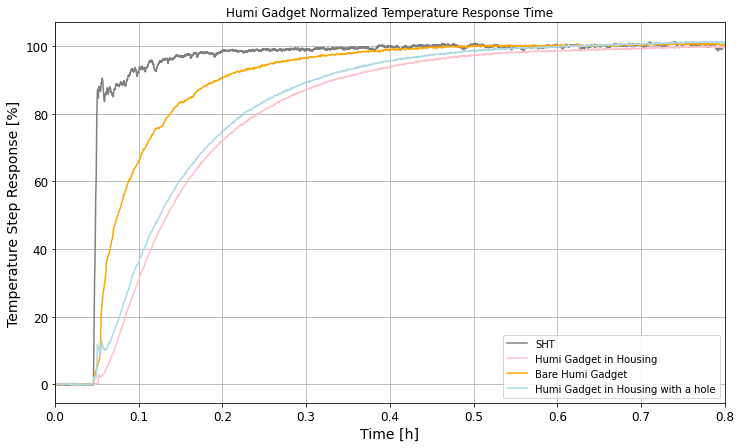

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.set_title('Humi Gadget Normalized Temperature Response Time')

color = ['grey', 'pink', 'orange', 'lightblue']
naming = ['SHT', 'Humi Gadget in Housing', 'Bare Humi Gadget', 'Humi Gadget in Housing with a hole']

# print(amb1.Epoch_UTC)

for nr, name in enumerate(sensor):
    ax.plot(name.Epoch_UTC/3600 - 0.9, name.Normalized*100, color = color[nr], label = naming[nr])

ax.set_ylabel('Temperature Step Response [%]', fontsize=14)
ax.set_xlabel('Time [h]', fontsize=14)
# ax.set_ylim(15,28)
ax.set_xlim(0, 0.8)
ax.legend(loc='lower right')
ax.tick_params(labelsize=12)
ax.grid()

# plt.savefig('T.png')